<a href="https://colab.research.google.com/github/Yasserashraf1/AI-Salaries-Analysis-Project-Using-R-and-Tableau/blob/main/intro_v1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# SECTION 1: DATA LOADING AND PREPARATION

In [ ]:
got_nodes=pd.read_csv("got_nodes.csv")
got_edges=pd.read_csv("got_edges.csv")
print(got_nodes.head(10))
print(100*"*")
print(got_edges.head(10))

      name      house    color
0      jon      stark  #DC143C
1  brienne      other  #FFFFFF
2   tyrion  lannister  #0000CD
3   ramsay      other  #FFFFFF
4   cersei  lannister  #0000CD
5    gilly      other  #FFFFFF
6     robb      stark  #DC143C
7    sansa      stark  #DC143C
8     arya      stark  #DC143C
9    davos      other  #FFFFFF
****************************************************************************************************
    source   target  Weight
0      jon  ygritte     159
1  brienne    jaime     127
2   tyrion    tywin     115
3   ramsay    theon     114
4   cersei   tyrion      95
5    gilly      sam      95
6     robb   talisa      89
7    sansa   tyrion      85
8     arya    hound      79
9    davos  stannis      77


In [ ]:
print(got_nodes.info())
print(100*"*")
print(got_edges.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    123 non-null    object
 1   house   123 non-null    object
 2   color   123 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB
None
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  500 non-null    object
 1   target  500 non-null    object
 2   Weight  500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ KB
None


# SECTION 2: NETWORK GRAPH CREATION

In [ ]:
# Create a directed graph (interactions have direction: source -> target)
G = nx.Graph()  # Using undirected graph as friendships are mutual
# Add nodes with their attributes (house and color)
for idx, row in got_nodes.iterrows():
    G.add_node(row['name'], house=row['house'], color=row['color'])

# Add edges with weight attribute (strength of interaction)
for idx, row in got_edges.iterrows():
    # Add both characters if not already in the graph
    if row['target'] not in G.nodes():
        G.add_node(row['target'], house='unknown', color='#808080')

    G.add_edge(row['source'], row['target'], weight=row['Weight'])

print(f"\n✓ Network graph created!")
print(f"  - Total nodes in graph: {G.number_of_nodes()}")
print(f"  - Total edges in graph: {G.number_of_edges()}")


✓ Network graph created!
  - Total nodes in graph: 123
  - Total edges in graph: 500


# SECTION 3: NETWORK METRICS CALCULATION


## 3.1 DEGREE CENTRALITY


In [ ]:
# Measures: Number of direct connections a character has
# Higher = More direct interactions with other characters
degree_centrality = nx.degree_centrality(G)
print("\n📊 DEGREE CENTRALITY (Most Connected Characters)")
print("-" * 50)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for rank, (character, score) in enumerate(sorted_degree, 1):
    print(f"{rank}. {character.upper()}: {score:.4f}")



📊 DEGREE CENTRALITY (Most Connected Characters)
--------------------------------------------------
1. ROBB: 0.2541
2. TYWIN: 0.2295
3. TYRION: 0.2049
4. CATELYN: 0.1803
5. JOFFREY: 0.1721
6. CERSEI: 0.1639
7. JON: 0.1557
8. SANSA: 0.1557
9. BRAN: 0.1393
10. ROOSE_BOLTON: 0.1393


## 3.2 BETWEENNESS CENTRALITY


In [ ]:
# Measures: How often a character appears on shortest paths between others
# Higher = Character acts as a bridge/broker between different groups
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
print("\n📊 BETWEENNESS CENTRALITY (Bridge Characters/Brokers)")
print("-" * 50)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for rank, (character, score) in enumerate(sorted_betweenness, 1):
    print(f"{rank}. {character.upper()}: {score:.4f}")


📊 BETWEENNESS CENTRALITY (Bridge Characters/Brokers)
--------------------------------------------------
1. ROBB: 0.2253
2. JON: 0.2111
3. NED: 0.2014
4. TYWIN: 0.1903
5. CATELYN: 0.1803
6. ROBERT: 0.1162
7. RICKON: 0.0925
8. TYRION: 0.0848
9. AERYS: 0.0842
10. DAVOS: 0.0842


## 3.3 CLOSENESS CENTRALITY


In [ ]:
# Measures: How close a character is to all other characters in the network
# Higher = Can quickly reach/influence others in the network
closeness_centrality = nx.closeness_centrality(G)
print("\n📊 CLOSENESS CENTRALITY (Information Spreaders)")
print("-" * 50)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for rank, (character, score) in enumerate(sorted_closeness, 1):
    print(f"{rank}. {character.upper()}: {score:.4f}")


📊 CLOSENESS CENTRALITY (Information Spreaders)
--------------------------------------------------
1. ROBB: 0.4784
2. NED: 0.4552
3. CATELYN: 0.4519
4. TYWIN: 0.4469
5. JOFFREY: 0.4236
6. TYRION: 0.4164
7. JAIME: 0.4150
8. BRAN: 0.4136
9. STANNIS: 0.4067
10. SANSA: 0.4053


## 3.4 EIGENVECTOR CENTRALITY


In [ ]:
# Measures: Influence based on connections to other influential characters
# Higher = Connected to other important/influential characters
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
    print("\n📊 EIGENVECTOR CENTRALITY (Most Influential)")
    print("-" * 50)
    sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for rank, (character, score) in enumerate(sorted_eigenvector, 1):
        print(f"{rank}. {character.upper()}: {score:.4f}")
except:
    print("\n⚠ Eigenvector centrality calculation did not converge")
    eigenvector_centrality = degree_centrality



📊 EIGENVECTOR CENTRALITY (Most Influential)
--------------------------------------------------
1. TYRION: 0.5485
2. TYWIN: 0.3877
3. CERSEI: 0.3705
4. SANSA: 0.3334
5. JOFFREY: 0.2696
6. OLENNA: 0.2123
7. MARGAERY: 0.2101
8. SHAE: 0.2095
9. BRONN: 0.1574
10. VARYS: 0.1285


## 3.5 WEIGHTED DEGREE (Sum of edge weights)


In [ ]:
# Measures: Total interaction strength for each character
weighted_degree = dict(G.degree(weight='weight'))
print("\n📊 WEIGHTED DEGREE (Interaction Strength)")
print("-" * 50)
sorted_weighted = sorted(weighted_degree.items(), key=lambda x: x[1], reverse=True)[:10]
for rank, (character, score) in enumerate(sorted_weighted, 1):
    print(f"{rank}. {character.upper()}: {score:.0f}")


📊 WEIGHTED DEGREE (Interaction Strength)
--------------------------------------------------
1. TYRION: 653
2. ROBB: 375
3. TYWIN: 364
4. SANSA: 363
5. CERSEI: 354
6. JON: 323
7. JAIME: 321
8. DAENERYS: 294
9. BRAN: 292
10. ARYA: 288


In [ ]:
got_nodes['name'].unique()

array(['jon', 'brienne', 'tyrion', 'ramsay', 'cersei', 'gilly', 'robb',
       'sansa', 'arya', 'davos', 'shae', 'bronn', 'daenerys', 'bran',
       'joffrey', 'margaery', 'jaime', 'barristan', 'catelyn',
       'kraznys_mo_nakloz', 'melisandre', 'edmure', 'gendry', 'olenna',
       'rickard_karstark', 'daario', 'littlefinger', 'podrick', 'meera',
       'orell', 'loras', 'tormund', 'beric', 'jojen', 'brynden', 'anguy',
       'ros', 'hodor', 'roose_bolton', 'myranda', 'selyse', 'jeor',
       'theon', 'craster', 'grenn', 'hound', 'osha', 'shireen', 'mance',
       'jorah', 'mero', 'rast', 'balon', 'eddison_tollett', 'grey_worm',
       'martyn', 'locke', 'maester_aemon', 'meryn_trant', 'talisa',
       'tywin', 'little_sam', 'pycelle', 'black_walder', 'farmer',
       'roslin', 'hot_pie', 'mace', 'ned', 'hoster', 'pyp', 'randyll',
       'greizhen', 'joyeuse', 'lord_of_bones', 'lothar', 'marei',
       'qyburn', 'robert', 'sorcerer', 'taryn_mant', 'aerys',
       'brandon_stark', 'hig

# SECTION 4: HOUSE-BASED ANALYSIS


## Analyze influence by house


In [ ]:
house_metrics = {}
for node in G.nodes():
    house = G.nodes[node].get('house', 'unknown')
    if house not in house_metrics:
        house_metrics[house] = {
            'members': [],
            'total_degree': 0,
            'total_betweenness': 0,
            'total_weighted_degree': 0
        }

    house_metrics[house]['members'].append(node)
    house_metrics[house]['total_degree'] += degree_centrality[node]
    house_metrics[house]['total_betweenness'] += betweenness_centrality[node]
    house_metrics[house]['total_weighted_degree'] += weighted_degree[node]

print("\n🏰 HOUSE INFLUENCE RANKINGS")
print("-" * 50)

house_influence = []
for house, metrics in house_metrics.items():
    total_influence = (metrics['total_degree'] +
                      metrics['total_betweenness'] +
                      metrics['total_weighted_degree']/100)
    house_influence.append((house, total_influence, len(metrics['members'])))

house_influence.sort(key=lambda x: x[1], reverse=True)

for rank, (house, influence, members) in enumerate(house_influence, 1):
    print(f"{rank}. {house.upper()}: Influence Score = {influence:.2f} | Members = {members}")

# Find most influential character per house
print("\n👑 MOST INFLUENTIAL CHARACTER PER HOUSE")
print("-" * 50)
for house, metrics in house_metrics.items():
    if metrics['members']:
        # Find member with highest betweenness centrality
        top_member = max(metrics['members'],
                        key=lambda x: betweenness_centrality[x])
        print(f"{house.upper()}: {top_member.upper()} "
              f"(Betweenness: {betweenness_centrality[top_member]:.4f})")


🏰 HOUSE INFLUENCE RANKINGS
--------------------------------------------------
1. OTHER: Influence Score = 58.67 | Members = 76
2. STARK: Influence Score = 24.44 | Members = 11
3. LANNISTER: Influence Score = 22.71 | Members = 10
4. TYRELL: Influence Score = 6.23 | Members = 4
5. BARATHEON: Influence Score = 6.18 | Members = 7
6. TARGARYEN: Influence Score = 5.38 | Members = 6
7. BOLTON: Influence Score = 3.55 | Members = 5
8. GREYJOY: Influence Score = 2.63 | Members = 3
9. TOLLETT: Influence Score = 0.47 | Members = 1

👑 MOST INFLUENTIAL CHARACTER PER HOUSE
--------------------------------------------------
STARK: ROBB (Betweenness: 0.2253)
OTHER: DAVOS (Betweenness: 0.0842)
LANNISTER: TYWIN (Betweenness: 0.1903)
TARGARYEN: AERYS (Betweenness: 0.0842)
TYRELL: LORAS (Betweenness: 0.0168)
BARATHEON: ROBERT (Betweenness: 0.1162)
BOLTON: ROOSE_BOLTON (Betweenness: 0.0060)
GREYJOY: THEON (Betweenness: 0.0352)
TOLLETT: EDDISON_TOLLETT (Betweenness: 0.0134)


## Rank houses by total influence (sum of all centrality measures)


In [ ]:
house_influence = []
for house, metrics in house_metrics.items():
    total_influence = (metrics['total_degree'] +
                      metrics['total_betweenness'] +
                      metrics['total_weighted_degree']/100)
    house_influence.append((house, total_influence, len(metrics['members'])))

house_influence.sort(key=lambda x: x[1], reverse=True)

for rank, (house, influence, members) in enumerate(house_influence, 1):
    print(f"{rank}. {house.upper()}: Influence Score = {influence:.2f} | Members = {members}")

# Find most influential character per house
print("\n👑 MOST INFLUENTIAL CHARACTER PER HOUSE")
print("-" * 50)
for house, metrics in house_metrics.items():
    if metrics['members']:
        # Find member with highest betweenness centrality
        top_member = max(metrics['members'],
                        key=lambda x: betweenness_centrality[x])
        print(f"{house.upper()}: {top_member.upper()} "
              f"(Betweenness: {betweenness_centrality[top_member]:.4f})")


1. OTHER: Influence Score = 58.67 | Members = 76
2. STARK: Influence Score = 24.44 | Members = 11
3. LANNISTER: Influence Score = 22.71 | Members = 10
4. TYRELL: Influence Score = 6.23 | Members = 4
5. BARATHEON: Influence Score = 6.18 | Members = 7
6. TARGARYEN: Influence Score = 5.38 | Members = 6
7. BOLTON: Influence Score = 3.55 | Members = 5
8. GREYJOY: Influence Score = 2.63 | Members = 3
9. TOLLETT: Influence Score = 0.47 | Members = 1

👑 MOST INFLUENTIAL CHARACTER PER HOUSE
--------------------------------------------------
STARK: ROBB (Betweenness: 0.2253)
OTHER: DAVOS (Betweenness: 0.0842)
LANNISTER: TYWIN (Betweenness: 0.1903)
TARGARYEN: AERYS (Betweenness: 0.0842)
TYRELL: LORAS (Betweenness: 0.0168)
BARATHEON: ROBERT (Betweenness: 0.1162)
BOLTON: ROOSE_BOLTON (Betweenness: 0.0060)
GREYJOY: THEON (Betweenness: 0.0352)
TOLLETT: EDDISON_TOLLETT (Betweenness: 0.0134)


# SECTION 5: GENDER-BASED ANALYSIS (IF DATA AVAILABLE)


## List of known female characters in the dataset


In [ ]:
female_characters = ['sansa', 'arya', 'cersei', 'brienne', 'ygritte',
                     'gilly', 'talisa', 'daenerys', 'margaery']

male_characters = [n for n in G.nodes() if n not in female_characters]

print("\n" + "="*80)
print("GENDER-BASED ANALYSIS")
print("="*80)

print(f"\n👩 Female Characters: {len([n for n in G.nodes() if n in female_characters])}")
print(f"👨 Male Characters: {len([n for n in G.nodes() if n not in female_characters])}")


GENDER-BASED ANALYSIS

👩 Female Characters: 9
👨 Male Characters: 114


## Find most influential female character


In [ ]:
female_influence = [(char, betweenness_centrality[char])
                    for char in G.nodes() if char in female_characters]
if female_influence:
    top_female = max(female_influence, key=lambda x: x[1])
    print(f"\n👑 Most Influential Female Character: {top_female[0].upper()} "
          f"(Betweenness: {top_female[1]:.4f})")


👑 Most Influential Female Character: GILLY (Betweenness: 0.0647)


# SECTION 6: NETWORK VISUALIZATION


## SUBPLOT 1: Main Network Graph ----


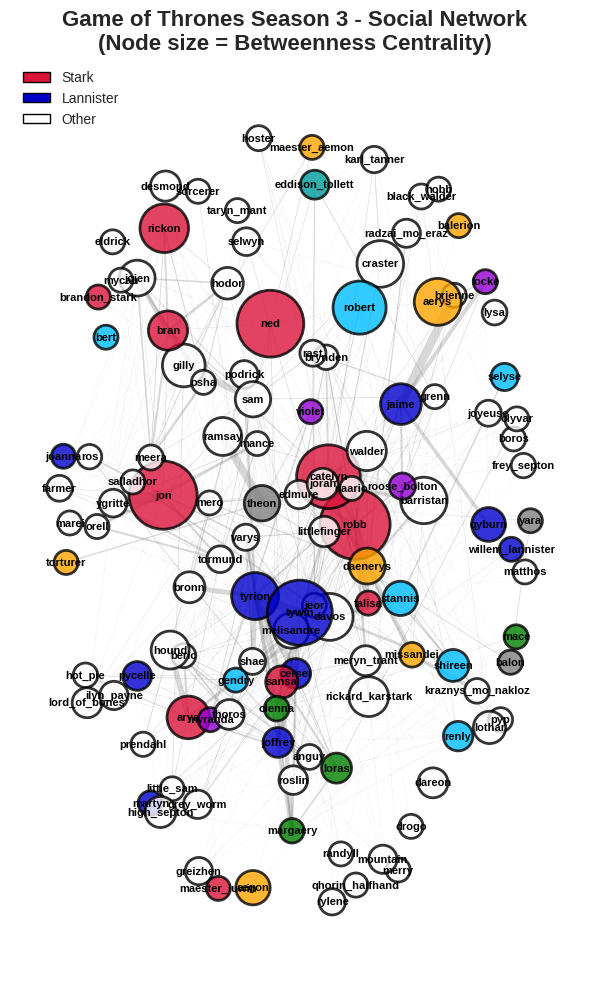

In [ ]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(25, 12))  # Increased width for better label display
ax1 = plt.subplot(2, 3, (1, 4))

# Use spring layout for better visualization
pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Prepare node colors based on house
node_colors = [G.nodes[node].get('color', '#808080') for node in G.nodes()]

# Calculate node sizes based on betweenness centrality
node_sizes = [betweenness_centrality[node] * 10000 + 300 for node in G.nodes()]

# Calculate edge widths based on weight
edge_widths = [G[u][v]['weight'] / 20 for u, v in G.edges()]

# Draw the network
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.3, edge_color='gray', ax=ax1)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes,
                       alpha=0.8, edgecolors='black', linewidths=2, ax=ax1)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax1)

ax1.set_title('Game of Thrones Season 3 - Social Network\n(Node size = Betweenness Centrality)',
              fontsize=16, fontweight='bold')
ax1.axis('off')

# Add legend for houses
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#DC143C', edgecolor='black', label='Stark'),
    Patch(facecolor='#0000CD', edgecolor='black', label='Lannister'),
    Patch(facecolor='#FFFFFF', edgecolor='black', label='Other')
]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=10)

## SUBPLOT 2: Top 10 Characters by Betweenness Centrality ----


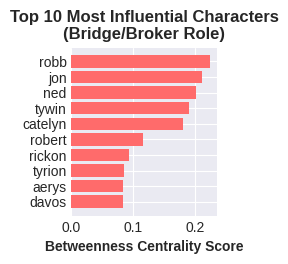

In [ ]:
ax2 = plt.subplot(2, 3, 2)
top_10_between = sorted_betweenness[:10]
characters = [x[0] for x in top_10_between]
scores = [x[1] for x in top_10_between]

bars = ax2.barh(characters, scores, color='#FF6B6B')
ax2.set_xlabel('Betweenness Centrality Score', fontweight='bold')
ax2.set_title('Top 10 Most Influential Characters\n(Bridge/Broker Role)', fontweight='bold')
ax2.invert_yaxis()

##  SUBPLOT 3: Top 10 Characters by Degree Centrality ----


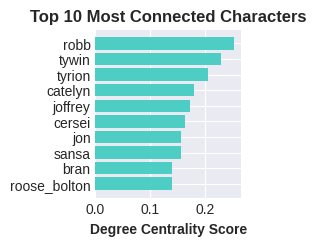

In [ ]:
ax3 = plt.subplot(2, 3, 3)
top_10_degree = sorted_degree[:10]
characters_deg = [x[0] for x in top_10_degree]
scores_deg = [x[1] for x in top_10_degree]

bars = ax3.barh(characters_deg, scores_deg, color='#4ECDC4')
ax3.set_xlabel('Degree Centrality Score', fontweight='bold')
ax3.set_title('Top 10 Most Connected Characters', fontweight='bold')
ax3.invert_yaxis()

##  SUBPLOT 4: House Influence Comparison


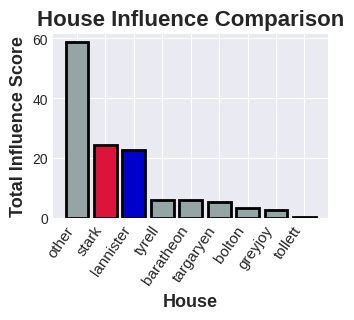

In [ ]:
plt.figure(figsize=(12, 7))  # Larger figure

ax4 = plt.subplot(2, 3, 5)

houses = [x[0] for x in house_influence]
influence_scores = [x[1] for x in house_influence]

colors_house = [
    '#DC143C' if h == 'stark' else
    '#0000CD' if h == 'lannister' else
    '#95A5A6'
    for h in houses
]

bars = ax4.bar(houses, influence_scores, color=colors_house, edgecolor='black', linewidth=2)

ax4.set_ylabel('Total Influence Score', fontweight='bold', fontsize=13)
ax4.set_xlabel('House', fontweight='bold', fontsize=13)
ax4.set_title('House Influence Comparison', fontweight='bold', fontsize=16)

# Make labels readable
plt.setp(ax4.get_xticklabels(), rotation=55, ha='right', fontsize=11)

plt.subplots_adjust(bottom=0.30, left=0.12)


##  SUBPLOT 5: Interaction Strength Distribution



✓ Visualization saved as 'got_social_network_analysis.png'


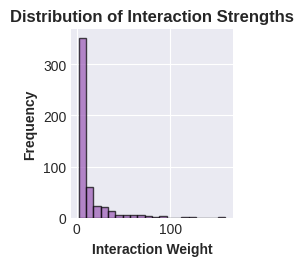

In [ ]:
ax5 = plt.subplot(2, 3, 6)
weights = [G[u][v]['weight'] for u, v in G.edges()]
ax5.hist(weights, bins=20, color='#9B59B6', edgecolor='black', alpha=0.7)
ax5.set_xlabel('Interaction Weight', fontweight='bold')
ax5.set_ylabel('Frequency', fontweight='bold')
ax5.set_title('Distribution of Interaction Strengths', fontweight='bold')

plt.tight_layout()
plt.savefig('got_social_network_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'got_social_network_analysis.png'")

# SECTION 7: ADDITIONAL NETWORK STATISTICS


In [ ]:
# Calculate network density
density = nx.density(G)
print(f"\n📈 Network Density: {density:.4f}")
print(f"   (Actual connections / Possible connections)")

# Calculate average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"\n🔗 Average Clustering Coefficient: {avg_clustering:.4f}")
print(f"   (How interconnected are character groups)")

# Find network diameter (if graph is connected)
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print(f"\n📏 Network Diameter: {diameter}")
    print(f"   (Maximum shortest path between any two characters)")
else:
    print(f"\n⚠ Network is not fully connected")

# Calculate average path length
if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"\n🛣️ Average Path Length: {avg_path_length:.4f}")
    print(f"   (Average steps between any two characters)")


📈 Network Density: 0.0666
   (Actual connections / Possible connections)

🔗 Average Clustering Coefficient: 0.5944
   (How interconnected are character groups)

📏 Network Diameter: 7
   (Maximum shortest path between any two characters)

🛣️ Average Path Length: 3.2619
   (Average steps between any two characters)


# SECTION 8: EXPORT RESULTS TO CSV


## Create comprehensive results dataframe


In [ ]:
results_df = pd.DataFrame({
    'Character': list(G.nodes()),
    'House': [G.nodes[node].get('house', 'unknown') for node in G.nodes()],
    'Degree_Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness_Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Closeness_Centrality': [closeness_centrality[node] for node in G.nodes()],
    'Eigenvector_Centrality': [eigenvector_centrality[node] for node in G.nodes()],
    'Weighted_Degree': [weighted_degree[node] for node in G.nodes()]
})


## Sort by betweenness centrality


## Display final summary


In [ ]:
results_df = results_df.sort_values('Betweenness_Centrality', ascending=False)
results_df.to_csv('got_network_metrics.csv', index=False)

print("\n✓ Results exported to 'got_network_metrics.csv'")
print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

# Display final summary
print("\n🎯 KEY FINDINGS SUMMARY:")
print("-" * 50)
print(f"Most Influential Character (Overall): {sorted_betweenness[0][0].upper()}")
print(f"Most Connected Character: {sorted_degree[0][0].upper()}")
print(f"Most Influential House: {house_influence[0][0].upper()}")
if female_influence:
    print(f"Most Influential Female: {top_female[0].upper()}")


✓ Results exported to 'got_network_metrics.csv'

ANALYSIS COMPLETE!

🎯 KEY FINDINGS SUMMARY:
--------------------------------------------------
Most Influential Character (Overall): ROBB
Most Connected Character: ROBB
Most Influential House: OTHER
Most Influential Female: GILLY
